In [65]:
import datetime

import pandas as pd
import numpy as np

In [66]:
def importdata():
    dataframe = pd.read_csv('../data/df_points_18-19-20-21_v1_weather_final.csv')
    return dataframe.sort_values(by=['dt_start'])

# Main

In [67]:
df = importdata()
df = df.reset_index(drop=True)
df.tail()

,bike_id,lat,lng,timestood,time_start,time_end,hex_id,temp,rain,snow,dt_start,dt_end
2435434,41605,51.338516,12.341863,39,2021-10-30 21:03:29,2021-10-30 21:42:31,881f1a8ca5fffff,11.03,NaN,NaN,1635627809,1635630151
2435435,75857,51.338516,12.341764,38,2021-10-30 21:03:57,2021-10-30 21:42:38,881f1a8ca5fffff,11.03,NaN,NaN,1635627837,1635630158
2435436,93472,51.337836,12.328287,22,2021-10-30 21:05:55,2021-10-30 21:28:00,881f1a8dd3fffff,11.03,NaN,NaN,1635627955,1635629280
2435437,97746,51.325991,12.388202,9,2021-10-30 21:22:07,2021-10-30 21:32:02,881f1a1655fffff,11.03,NaN,NaN,1635628927,1635629522
2435438,41627,51.348080,12.351772,27,2021-10-30 21:22:46,2021-10-30 21:50:43,881f1a8cabfffff,11.03,NaN,NaN,1635628966,1635630643


In [68]:
import sklearn.metrics as metrics
pd.options.mode.chained_assignment = None


def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [69]:
# Split into Train and Testset

spliting_date = pd.Timestamp(2018,1,1)
splitting_ind = df.index[pd.to_datetime(df['time_start'])>spliting_date].tolist()[0]

X_train = df.loc[:splitting_ind].drop(['timestood'], axis = 1)
y_train = df.loc[:splitting_ind, 'timestood']
X_test = df.loc[splitting_ind:].drop(['timestood'], axis = 1)
y_test = df.loc[:splitting_ind, 'timestood']

LR: nan (nan)
NN: nan (nan)
KNN: nan (nan)
RF: nan (nan)
SVR: nan (nan)


/usr/local/Caskroom/miniconda/base/envs/geobike/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2 fits failed out of a total of 2.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/Caskroom/miniconda/base/envs/geobike/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/Caskroom/miniconda/base/envs/geobike/lib/python3.9/site-packages/sklearn/linear_model/_base.py", line 662, in fit
    X, y = self._validate_data(
  File "/usr/local/Caskroom/miniconda/base/envs/geobike/lib/python3.9/site-package

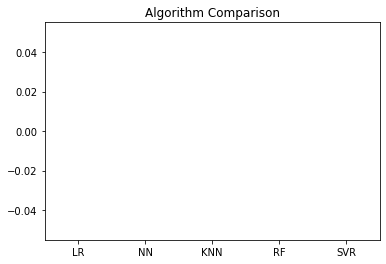

In [70]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import sklearn

import warnings
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning


# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor()))
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=2)

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=ConvergenceWarning)
        cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')

    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [47]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we